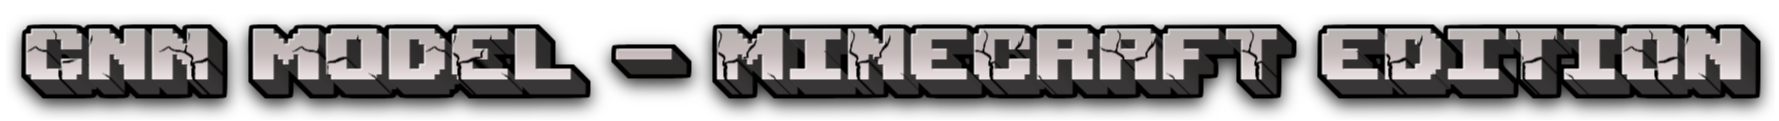
___________

<div>
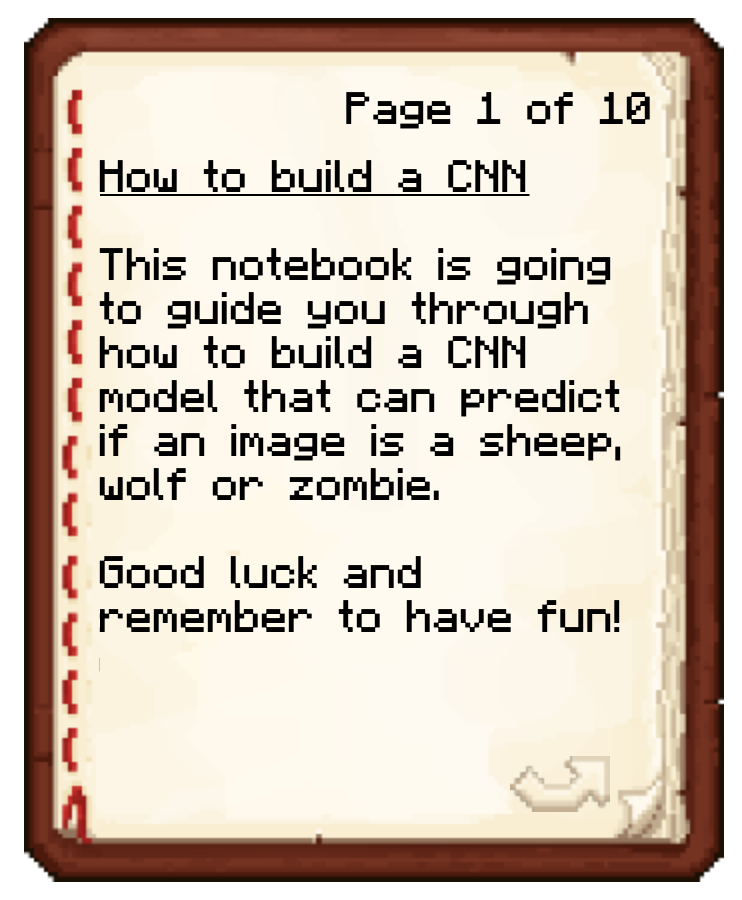
</div>

_______
## Let's begin with the basics of Jupyter Notebook

- The grey boxes throughout this document are called cells.
- You can write as much or as little code in one cell as you would like. However, when you run one cell, all of the code within it gets executed in one go! It is therefore wise to split your code up.
- To run a cell, simply click on it and press Shift and Enter.
- To the left of the cell you will see 'In [  ]:'. Whenever it reads 'In [ * ]:', then the code is still running. Whenever it reads, 'In [ 1 ]:' which would be the first line, the cell has executed.

Now that you're equipped with everything you need to get through this notebook, let's begin!
_______

## So...What is a CNN?

First of all CNN stands for Convolutional Neural Network. It's quite the mouthful.

CNN models can be quite complex, but we're going to break it down together.

So, have you ever wondered how you can unlock your phone just by showing it your face? Well, you can thank image classification for this magical trick.

CNN models help us classify images. In fact, it's the main approach that Machine Learning Engineers use in their daily work to deliver us incredible technology, such as Facebook automatic tagging, face recognition and even driverless cars.

It's safe to say we use this kind of technology on the daily and we put a lot of trust in it (especially when letting your Tesla play chaffeur).

The magic behind this is as follows: A CNN is an algorithm that takes an image as an input and learns all on its own how to identify the object in the image.

We will explain this in more depth as we go along.

# 

## Let the code commence!

<table><tr>
<td> 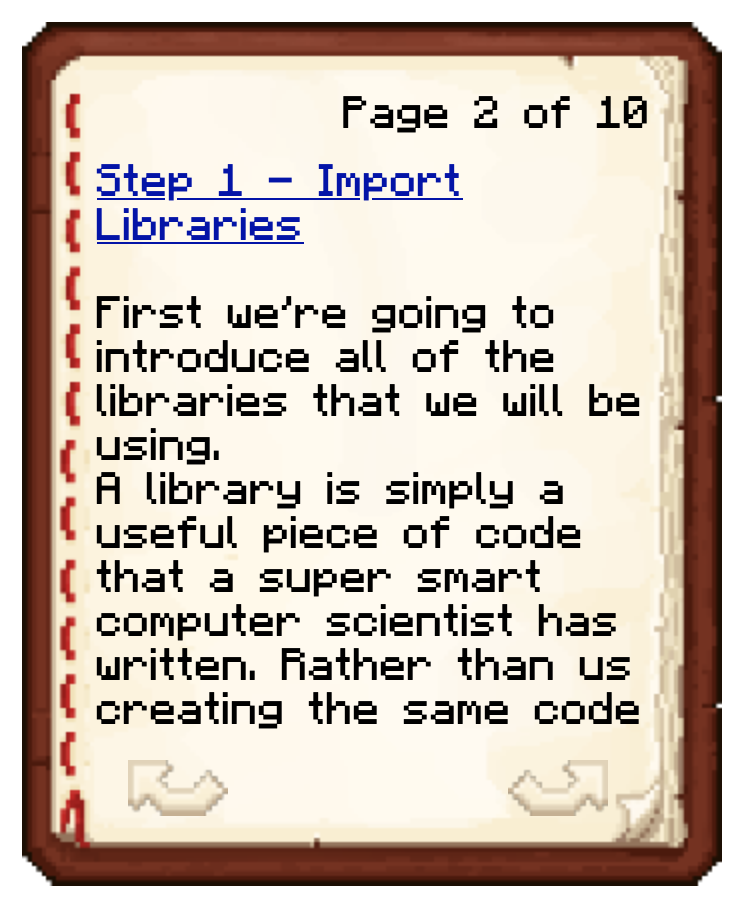 </td>
<td> <img src="attachment:Screenshot%202021-08-11%20at%2012.16.11.png" alt="Page 3" style="width: 250px;"/> </td>
</tr></table>

One library that we're going to be using is called 'random', which includes the function 'shuffle'. Shuffle will randomly jumble a bunch of items, kind of like putting them all into a hat and shaking it. We don't have to think up how to do this ourselves since somebody before us has already solved and provided the answer for us.

Go ahead and run the next cell to import our libraries!

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import random
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

print("Objective complete.")

Objective complete.


If you received an "Objective complete" message then you're doing great and the libraries have been loaded in.

In [2]:
#Paste your chosen location for the training images between "" in path_to_images
path_to_images = "/Users/Rebecca/Desktop/minecraft/CNN Model Images/train images/"
size_of_image = 80
minecraft_mob_type = ["sheep", "wolf", "zombie"]
training_data = []
validation_data = []
count = 0
def create_data():
    for category in minecraft_mob_type:
        path = os.path.join(path_to_images, category,"")
        class_num = minecraft_mob_type.index(category)
        for mob_image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,mob_image))
                new_array = cv2.resize(image_array, (size_of_image, size_of_image))
                if (count==0):
                    training_data.append([new_array, class_num])
                else:
                    validation_data.append([new_array, class_num])
            except Exception as e:
                continue
                
create_data()
count+=1

#Paste your chosen location for the validation images between "" in path_to_images
path_to_images="/Users/Rebecca/Desktop/minecraft/CNN Model Images/validation images/"
create_data()

Now let's check how many training images we have:

In [ ]:
print(len(training_data))

Now we know that we have 500 images of sheep, wolves and zombies that our model can learn from!

How about we find out how many validation images we have?

In [ ]:
print(len(validation_data))

We can see that there are 76 validation images. Our model doesn't need nearly the same amount of validation images as training images.

Think back to the start of this notebook when we talked about libraries. Do you remember how we mentioned the library 'random', and how it can randomly shuffle items? Well we're about to put that to the test! 

In [ ]:
random.shuffle(training_data)
random.shuffle(validation_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

In [ ]:
training_features = []
training_labels = []

validation_features = []
validation_labels = []

In [ ]:
for features, label in training_data:
    training_features.append(features)
    training_labels.append(label)

training_features = np.array(training_features).reshape(-1, size_of_image, size_of_image, 3)
training_labels = np.array(training_labels)

for features, label in validation_data:
    validation_features.append(features)
    validation_labels.append(label)

validation_features = np.array(validation_features).reshape(-1, size_of_image, size_of_image, 3)
validation_labels = np.array(validation_labels)

In [ ]:
training_features = training_features/255.0
validation_features = validation_features/255.0

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(size_of_image, size_of_image, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model.fit(training_features, training_labels, batch_size=4, epochs=50, validation_data=(validation_features, validation_labels))

In [ ]:
path_to_test_images = "/Users/Rebecca/Desktop/minecraft/CNN Model Images/test images/"

sheep_num_right = 0
wolf_num_right = 0
zombie_num_right = 0

for category in minecraft_mob_type:
    path = os.path.join(path_to_test_images, category,"")
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (size_of_image, size_of_image))
            output = new_array.reshape(-1, size_of_image, size_of_image, 3)
            prediction = model.predict(output)
            if ((category=="sheep") & (np.argmax(prediction)==0)):
                sheep_num_right +=1
            elif ((category=="wolf") & (np.argmax(prediction)==1)):
                wolf_num_right += 1
            elif ((category=="zombie") & (np.argmax(prediction)==2)):
                zombie_num_right += 1
            else:
                continue
        except Exception as e:
            continue

In [ ]:
sheep_percent = (sheep_num_right/21)
format_sheep = "{:.0%}".format(sheep_percent)
print("Sheep correct:", format_sheep)

In [ ]:
wolf_percent = (wolf_num_right/20)
format_wolf = "{:.0%}".format(wolf_percent)
print("Wolf correct:", format_wolf)

In [ ]:
zombie_percent = (zombie_num_right/19)
format_zombie = "{:.0%}".format(zombie_percent)
print("Zombie correct:", format_zombie)

In [ ]:
model.save("Minecraft-CNN.model")